# OSM 2018 Economics 
## Problem Set 5
### 07.23.2018 
### Yung-Hsu Tsui*

### Exercise 1 Health Claims
#### 1. (a)

In [5]:
# Importing the package
import numpy as np
import pandas as pd
import scipy.stats  as sts
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib notebook
pts = np.loadtxt('clms.txt') #importing health claims data
df1= DataFrame(pts, columns=['Health Claims'])
df1.describe()

,Health Claims
count,10619.000000
mean,720.277975
std,3972.850824
min,0.010000
25%,74.450000
50%,172.210000
75%,451.535000
max,227967.250000


<IPython.core.display.Javascript object>


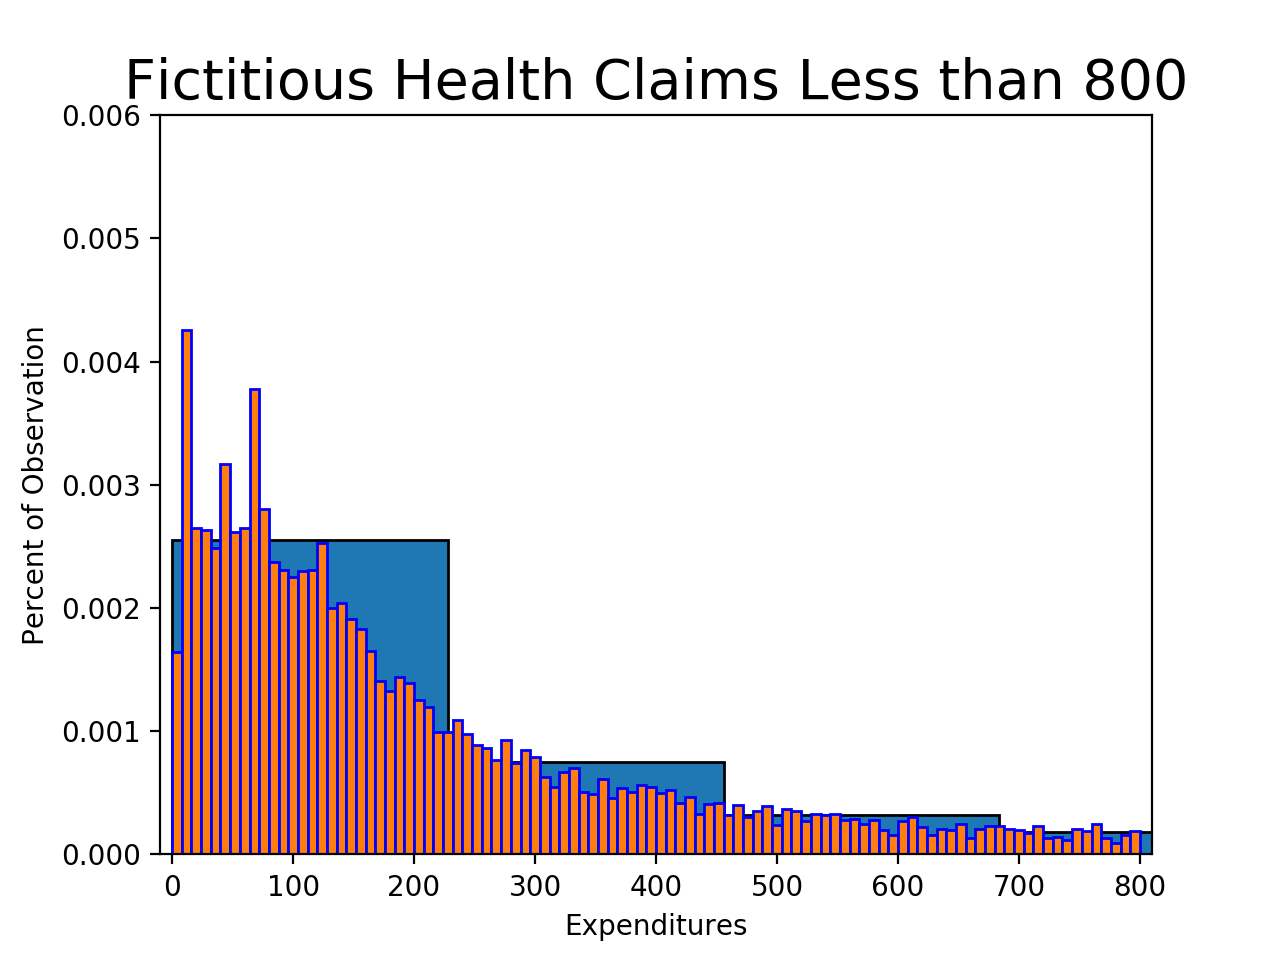

(0, 10000)

In [6]:
# Plotting First Historgram
count, bins, ignored = plt.hist(pts, 1000, edgecolor='black', normed=True)
plt.title('Fictitious Health Claims ', fontsize=20)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([0, 10000])

In [7]:
# Plotting Second Historgram
n=100
weights = np.empty_like(pts)
weights.fill((len(pts[pts<=800])/len(pts)) * n / (800-0) / pts.size)
count, bins, ignored = plt.hist(pts, n, edgecolor='blue',weights=weights, range=(0,800))
plt.title('Fictitious Health Claims Less than 800', fontsize=20)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([-10, 810])
plt.ylim([0,0.006])

(0, 0.006)

I prefer the latter one. The reason is because the latter one focuses on the information that I desire the most. What I care about is the distributio for most of people, whose expdenditures are mostly below $800. 

#### 1.(b)

<IPython.core.display.Javascript object>


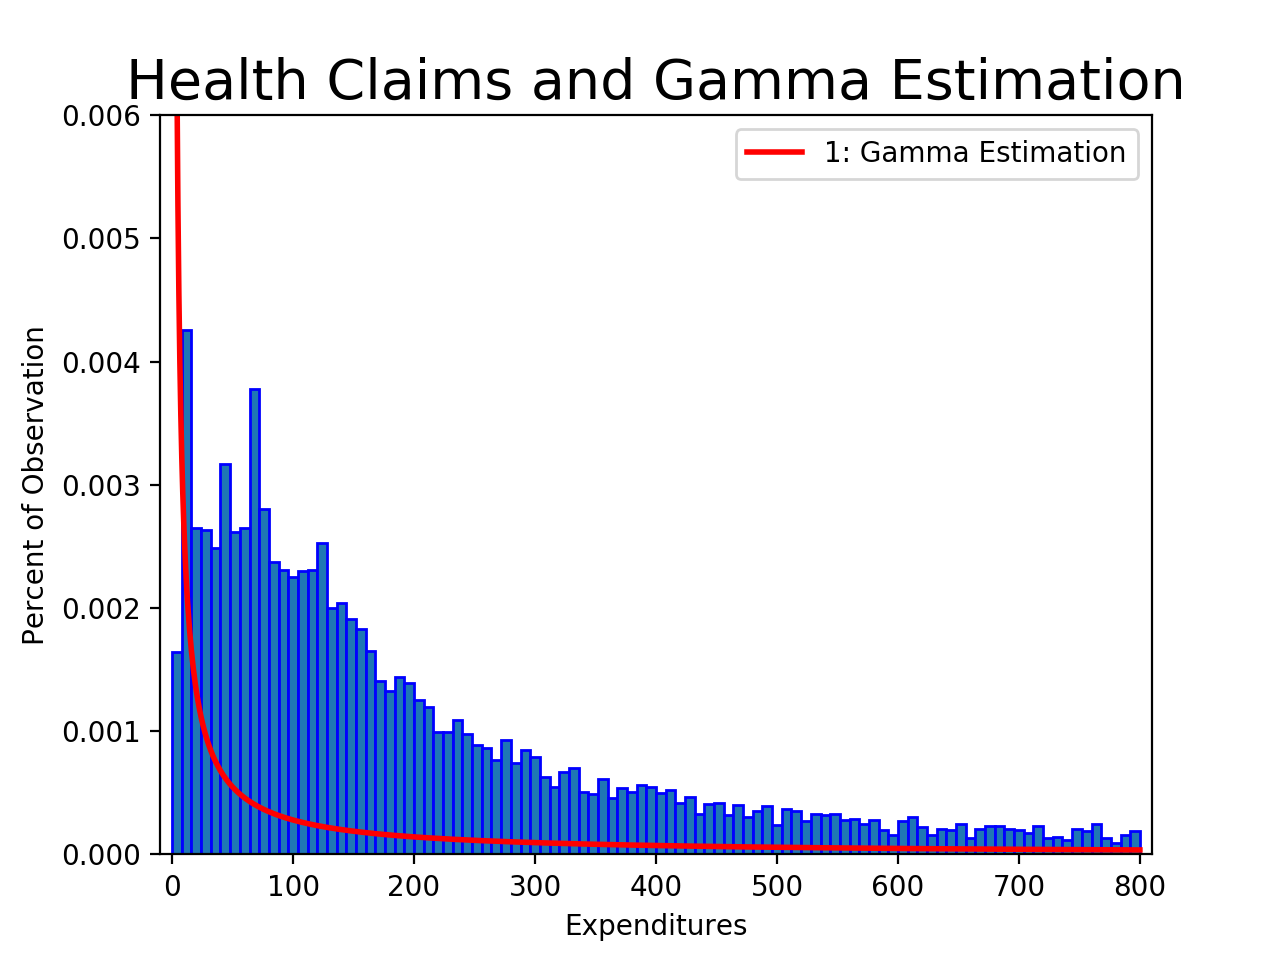

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


Log-likelihood 1:  -93555.39390345218
alpha_MLE= 0.4338847309380496  beta_MLE= 1911.0646160835292


      fun: 77795.05765521122
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.01164153,  0.31723175])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 30
      nit: 7
   status: 0
  success: True
        x: array([4.33884731e-01, 1.91106462e+03])

In [8]:
# Importing the package
# Gamma Distribution
from scipy.special import gamma
import scipy.special as sps
import scipy.optimize as opt
import matplotlib.pyplot as plt

#Functions
def gamma_pdf(xvals,alpha,beta):
    pdf = xvals**(alpha-1) * (np.exp(-xvals/beta)) / (sps.gamma(alpha) * beta**alpha) 
    return pdf

def log_lik_gamma(xvals, a, b):
    pdf_vals = gamma_pdf(xvals, a , b)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gamma(params, args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma(xvals,alpha,beta)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

#Settings
mu = np.mean(pts)
var = np.var(pts)
beta = var/mu
alpha = mu/beta
m = 1

#Initial Guesses
alpha_init = alpha
beta_init = beta -20000
params1_init = np.array([alpha_init, beta_init])
mle_args = pts

#Plot
%matplotlib notebook
n=100
weights = np.empty_like(pts)
weights.fill((len(pts[pts<=800])/len(pts)) * n / (800-0) / pts.size)
count, bins, ignored = plt.hist(pts, n, edgecolor='blue',weights=weights, range=(0,800))
plt.title('Health Claims and Gamma Estimation', fontsize=20)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([-10, 810])
plt.ylim([0,0.006])
dist_pts = np.linspace(0, 800, 1000)
plt.plot(dist_pts, gamma_pdf(dist_pts, alpha=alpha, beta=beta),linewidth=2, color='r',label='1: Gamma Estimation')
plt.legend(loc='upper right')

#Log-likelihood
print('Log-likelihood 1: ', log_lik_gamma(pts, alpha, beta))

#MLE-result
results1 = opt.minimize(crit_gamma, params1_init, args=(mle_args), method='L-BFGS-B', bounds=((1e-10, None),(1e-10, None)))
alpha1_MLE, beta1_MLE = results1.x
print('alpha_MLE=', alpha1_MLE, ' beta_MLE=', beta1_MLE)
results1

#### 1. (c)

Log-likelihood 2:  -77795.05765521122
alpha_MLE= 0.42044331692267534  beta_MLE= 1911.0127517241738 m_MLE= 0.8365441994872226


<IPython.core.display.Javascript object>


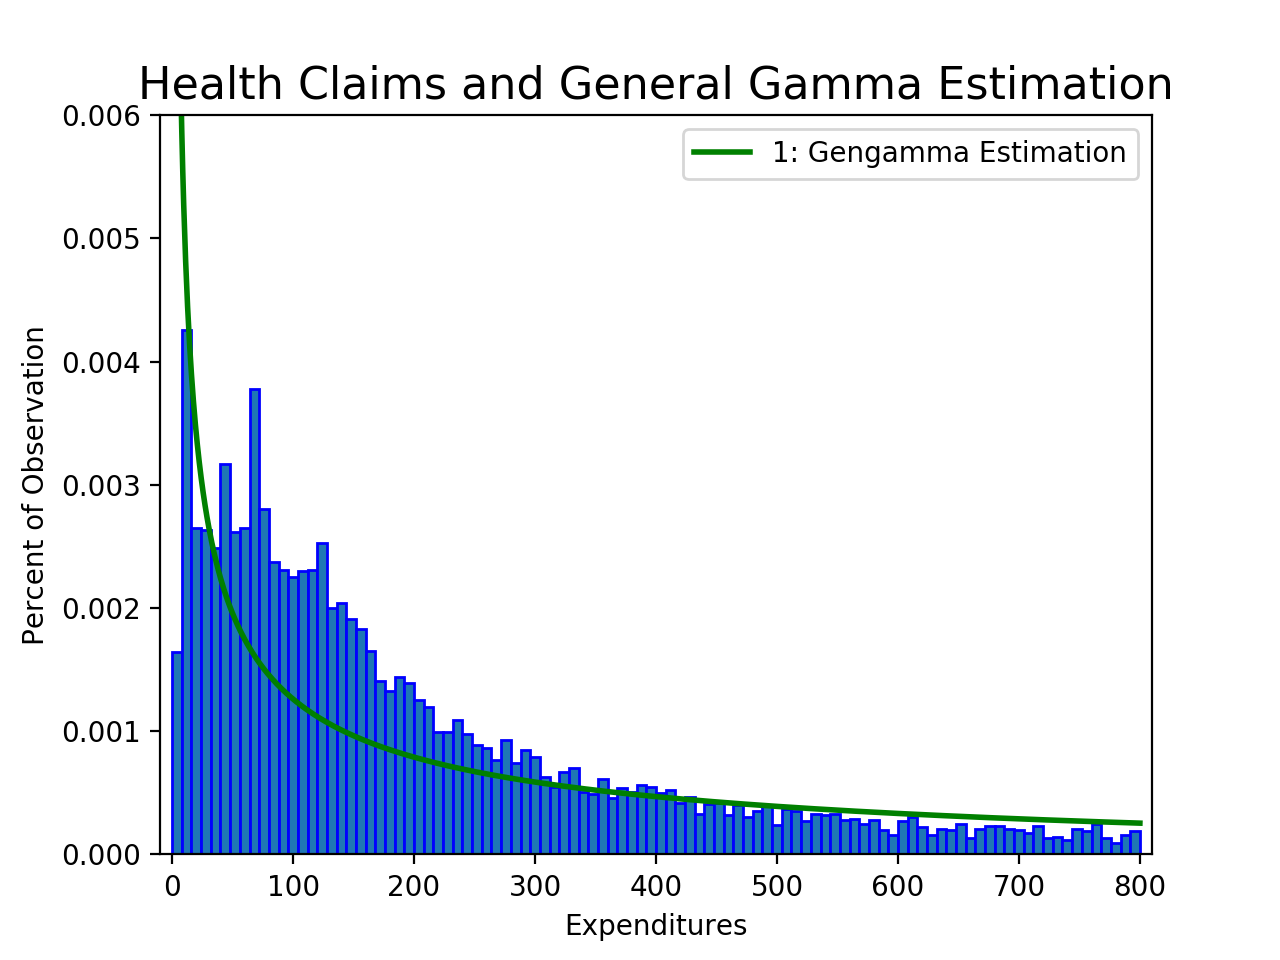

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


      fun: 77564.22323018516
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.0349246 ,  0.6868504 , -0.22555469])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 32
      nit: 4
   status: 0
  success: True
        x: array([4.20443317e-01, 1.91101275e+03, 8.36544199e-01])

In [14]:
#Importing Package
#Generalized Gamma Distribution
from scipy.special import gamma
import scipy.special as sps
import scipy.optimize as opt
import matplotlib.pyplot as plt

#Functions
def gengamma_pdf(xvals,a,b,m):
    pdf2  = (m*(xvals**(a-1))*(np.exp(-(xvals/b)**m)))/((b**a)*sps.gamma(a/m))
    return pdf2

def log_lik_gengamma(xvals, alpha, beta, m):
    pdf_vals = gengamma_pdf(xvals, a=alpha, b=beta, m=m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit_gengamma(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gengamma(xvals,alpha, beta,m)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

#Initial Guesses from Part(b)
alpha_init = alpha1_MLE
beta_init = beta1_MLE
params2_init = np.array([alpha_init, beta_init,m])
mle_args = pts
m=1

#Log-likelihood
print('Log-likelihood 2: ', log_lik_gengamma(pts, alpha_init, beta_init,m))

#MLE-result
results2 = opt.minimize(crit_gengamma, params2_init, args=(mle_args), method='L-BFGS-B',bounds=((1e-10, None),(1e-10, None),(1e-10, None)))
alpha2_MLE, beta2_MLE, m2_MLE = results2.x
print('alpha_MLE=', alpha2_MLE, ' beta_MLE=', beta2_MLE, 'm_MLE=', m2_MLE)

#Plot
%matplotlib notebook
n=100
weights = np.empty_like(pts)
weights.fill((len(pts[pts<=800])/len(pts)) * n / (800-0) / pts.size)
count, bins, ignored = plt.hist(pts, n, edgecolor='blue',weights=weights, range=(0,800))
plt.title('Health Claims and General Gamma Estimation', fontsize=16)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([-10, 810])
plt.ylim([0,0.006])
dist_pts = np.linspace(0, 800, 1000)
plt.plot(dist_pts, gengamma_pdf(dist_pts, a=alpha2_MLE, b=beta2_MLE, m=m2_MLE),linewidth=2, color='g',label='1: Gengamma Estimation')
plt.legend(loc='upper right')
results2

#### 1.(d)

<IPython.core.display.Javascript object>


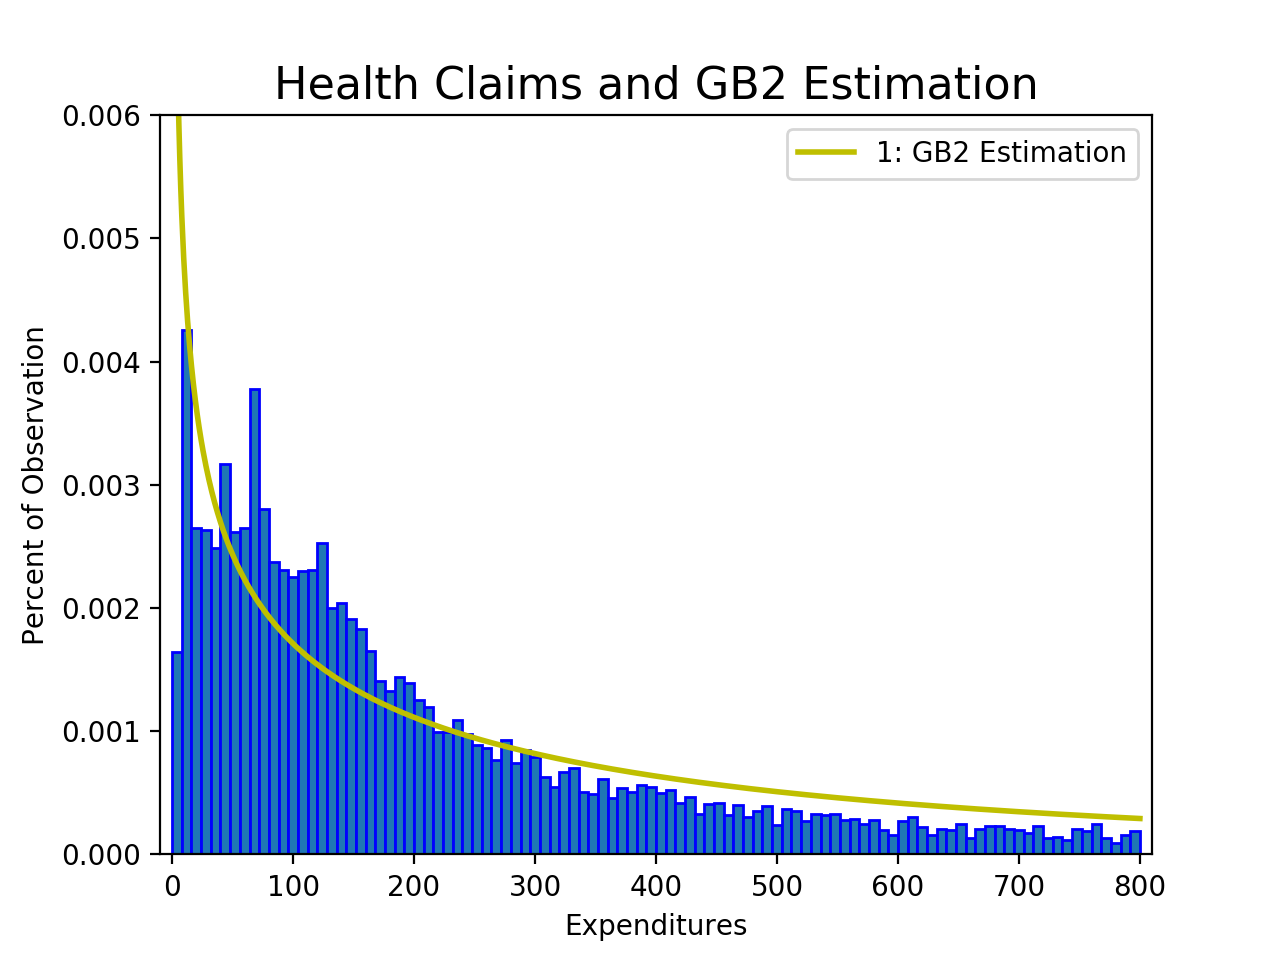

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':


In [17]:
##Generalized Beta 2 Distribution
from scipy.special import beta
import scipy.special as sps
import scipy.optimize as opt
import matplotlib.pyplot as plt

#Functions
def gb2_pdf(xvals,a,b,p,q):
    pdf3 = a*xvals**(a*p-1)/(b**(a*p)*(1+(xvals/b)**a)**(p+q)*sps.beta(p,q))
    return pdf3

def log_lik_gb2(xvals, a, b, p, q):
    pdf_vals = gb2_pdf(xvals, a, b, p, q)
    log_pdf_vals = np.log(pdf_vals)
    log_lik_val = log_pdf_vals.sum()
    return log_lik_val

def crit_gb2(params, args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_gb2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

#Initial Guesses from Part(c)
q=10000
a_init = m2_MLE
b_init = beta2_MLE*q**(1/m2_MLE) 
p_init = alpha2_MLE/m2_MLE 
params3_init = np.array([a_init, b_init,p_init,q])
mle_args = pts

#Plot
%matplotlib notebook
n=100
weights = np.empty_like(pts)
weights.fill((len(pts[pts<=800])/len(pts)) * n / (800-0) / pts.size)
count, bins, ignored = plt.hist(pts, n, edgecolor='blue',weights=weights, range=(0,800))
plt.title('Health Claims and GB2 Estimation', fontsize=16)
plt.xlabel('Expenditures')
plt.ylabel('Percent of Observation')
plt.xlim([-10, 810])
plt.ylim([0,0.006])
dist_pts = np.linspace(0, 800, 1000)
plt.plot(dist_pts, gb2_pdf(dist_pts, a=a_MLE, b=b_MLE , p=p_MLE,q=q_MLE),linewidth=2, color='y',label='1: GB2 Estimation')
plt.legend(loc='upper right')



#### 1.(e)

In [16]:
#Log-likelihood
print('Log-likelihood 3: ', log_lik_gb2(pts, a= a_init, b=b_init,p=p_init,q=q))

#MLE-result
results3 = opt.minimize(crit_gb2, params3_init, args=(mle_args), method='L-BFGS-B',bounds=((1e-10, None),(1e-10, None),(1e-10, None),(1e-10, None)))
a_MLE, b_MLE, p_MLE, q_MLE = results3.x
print('a_MLE=', a_MLE, ' b_MLE=', b_MLE, 'p_MLE=', p_MLE, 'q_MLE=',q_MLE)

results3

Log-likelihood 3:  -77563.79644288731
a_MLE= 0.7511126257795371  b_MLE= 115568634.7446355 p_MLE= 0.8717992669919277 q_MLE= 9999.992183196862


      fun: 76671.12229729147
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([57.53390724,  0.        ,  9.80508048,  0.97061275])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 85
      nit: 10
   status: 0
  success: True
        x: array([7.51112626e-01, 1.15568635e+08, 8.71799267e-01, 9.99999218e+03])

#### 1.(f)

In [12]:
# Probability Calculation
from scipy.integrate import quad
def integrand1(x):
    return gb2_pdf(x, a=a_MLE, b=b_MLE, p=p_MLE, q=q_MLE)
def integrand2(x):
    return gamma_pdf(x, alpha=alpha1_MLE, beta=beta1_MLE)
prob1 = quad(integrand1,0, 1000)
prob2 = quad(integrand2,0, 1000)
print('Probability above $1000 GB2 = ', 1-prob1[0])
print('Probability above $1000 Gamma = ', 1-prob2[0])

Probability above $1000 GB2 =  0.16932360419301862
Probability above $1000 Gamma =  0.2642428915269347


From the results we obtain, it is not less likely to have a health claim over 1,000 with GB2 distribution.
The probability of having claims over 1,000 increases when we use Gamma distribution.

### Exercise 2
#### 2.(a)

In [34]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
c = np.loadtxt('MacroSeries.txt', delimiter=",",usecols=0)
k = np.loadtxt('MacroSeries.txt', delimiter=",",usecols=1)
w = np.loadtxt('MacroSeries.txt', delimiter=",",usecols=2)
r = np.loadtxt('MacroSeries.txt', delimiter=",",usecols=3)

#AR(1) Normal Distribution
def ar1_norm1_pdf(k, w, alpha, rho, sigma):
    z=-alpha*np.log(k)+np.log(w)-np.log(1-alpha)     #Generating z_t sequence with (k,w)
    zt1=np.append(z[0],z[0:(len(z)-1)])                     #Generating z_t-1 sequence
    mu_z=rho*zt1+(1-rho)*z[0]                       #Generating mu_z sequence
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (z - mu_z)**2 / (2 * sigma**2))))
    return pdf_vals

#Log Likelihood Function of ç Distribution
def log_lik_ar1norm1(k, w, alpha, rho, sigma):
    pdf_vals = ar1_norm1_pdf(k, w, alpha, rho, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

#Criterion Function of AR(1) Normal Distribution
def critar11(params, *args):
    alpha, rho, sigma = params
    k,w = args
    log_lik_val = log_lik_ar1norm1(k, w, alpha, rho, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

#MLE Estimates and Inverse Hessian Matrix
import scipy.optimize as opt
alpha1_init = 0.01 # alpha in [0,1] 
rho1_init = 0.3  # rho in [-1,1]
sig1_init = 0.1   # sigma > 0
mle1_args = (k,w) # Using (k,w)
params1_init = np.array([alpha1_init, rho1_init, sig1_init])
results1 = opt.minimize(critar11, params1_init, args =(mle1_args),method='L-BFGS-B', bounds=((1e-10, None),(1e-10, None),(1e-10, None)))
alpha1_MLE, rho1_MLE, sigma1_MLE = results1.x
mu1_MLE=-alpha1_MLE*np.log(k[0])+np.log(w[0])-np.log(1-alpha1_MLE)
print('alpha_MLE=', alpha1_MLE, ' rho_MLE=', rho1_MLE,' mu_MLE=',mu1_MLE,' sigma_MLE=',sigma1_MLE)
results1
vcv_mle11 = results1.hess_inv
vcv_mle12 = results1.hess_inv.matmat(np.eye(3)) #Hessian Matrix
success = results1.success
print('Success = ', success)
print('VCV result = ',vcv_mle11) 
print(vcv_mle12)

alpha_MLE= 0.1509192983948631  rho_MLE= 0.49661924553172176  mu_MLE= 13.995592979868933  sigma_MLE= 0.18734388998985685
Success =  True
VCV result =  <3x3 LbfgsInvHessProduct with dtype=float64>
[[ 1.08222328  0.12815758 -1.3736303 ]
 [ 0.12815758  1.19921383 -2.13803888]
 [-1.3736303  -2.13803888  5.04789141]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


#### 2.(b)

In [32]:
#AR(1) Normal Distribution
def ar1_norm2_pdf(k, r, alpha, rho, sigma):              
    z=(1-alpha)*np.log(k)-np.log(alpha)+np.log(r)     #Generating z_t sequence with (k,r)
    zt1=np.append(z[0],z[0:(len(z)-1)])                       #Generating z_t-1 sequence
    mu_z=rho*zt1+(1-rho)*z[0]                         #Generating mu_z sequence
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (z - mu_z)**2 / (2 * sigma**2))))
    return pdf_vals

#Log Likelihood Function of ç Distribution
def log_lik_ar1norm2(k, r, alpha, rho, sigma):
    pdf_vals = ar1_norm2_pdf(k, r, alpha, rho, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

#Criterion Function of AR(1) Normal Distribution
def critar12(params, *args):
    alpha, rho, sigma = params
    k,r = args
    log_lik_val = log_lik_ar1norm2(k, r, alpha, rho, sigma)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

#MLE Estimates and Inverse Hessian Matrix
import scipy.optimize as opt
alpha2_init = 0.5  
rho2_init = 0.8     
sig2_init = 0.05    
mle2_args = (k,r)   # Using k and r 
params2_init = np.array([alpha2_init, rho2_init, sig2_init])
results2 = opt.minimize(critar12, params2_init, args =(mle2_args),method='L-BFGS-B', bounds=((1e-10, None),(1e-10, None),(1e-10, None)))
alpha2_MLE, rho2_MLE, sigma2_MLE = results2.x
mu2_MLE=(1-alpha2_MLE)*np.log(k[0])+np.log(r[0])-np.log(alpha2_MLE)

print('alpha_MLE=', alpha2_MLE, ' rho_MLE=', rho2_MLE,' mu_MLE=',mu2_MLE,' sigma_MLE=',sigma2_MLE)
results2
vcv_mle21 = results2.hess_inv
vcv_mle22 = results2.hess_inv.matmat(np.eye(3)) #Hessian Matrix
success = results2.success
print('Success = ', success)
print('VCV result = ',vcv_mle21) 
print(vcv_mle22)

alpha_MLE= 0.5027092310610529  rho_MLE= 0.8053992490144265  mu_MLE= 8.603492699153481  sigma_MLE= 0.12284405181543262
Success =  True
VCV result =  <3x3 LbfgsInvHessProduct with dtype=float64>
[[ 1.00198434  0.00405375 -0.06704356]
 [ 0.00405375  1.00827933 -0.13688869]
 [-0.06704356 -0.13688869  0.02339417]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


#### 2.(c)

In [33]:
##1(c)
#Using equation (4), we get 'z_t = -ln(alpha) + (1-alpha)*ln(k_t)' when r_t = 1.
from scipy.integrate import quad
def ar1_norm3_pdf(r, alpha, rho, mu, sigma):
    z=np.log(r)+(1-alpha)*np.log(75000000)-np.log(alpha)  #Generating z_t sequence with (k=75000000,r)
    zt_1=10                                             #z_(t-1)=10
    mu_z=rho*zt_1+(1-rho)*mu                            #Generating mu_z sequence
    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (z - mu_z)**2 / (2 * sigma**2))))
    return pdf_vals
def integrand1(x):
    return ar1_norm3_pdf(r=x, alpha=alpha1_MLE, rho=rho1_MLE, mu=mu1_MLE, sigma=sigma1_MLE)
prob1 = quad(integrand1,0, 1)                           #Intergrating r from 0 to 1, given k=25000 and z_(t-1)=10
print('The probability that r>1 is', 1-prob1[0])

The probability that r>1 is 0.9947970827008579


### Exercise 3
#### 3.(a)

In [18]:
#1.a_1
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
pts = np.loadtxt('usincmoms.txt')
df= DataFrame(pts, columns=['Percentage','Income'])
df.describe()

,Percentage,Income
count,42.000000,42.000000
mean,0.023810,107738.095238
std,0.018139,67419.350021
min,0.002577,2500.000000
25%,0.007815,53750.000000
50%,0.019920,105000.000000
75%,0.036249,156250.000000
max,0.058859,300000.000000


<IPython.core.display.Javascript object>


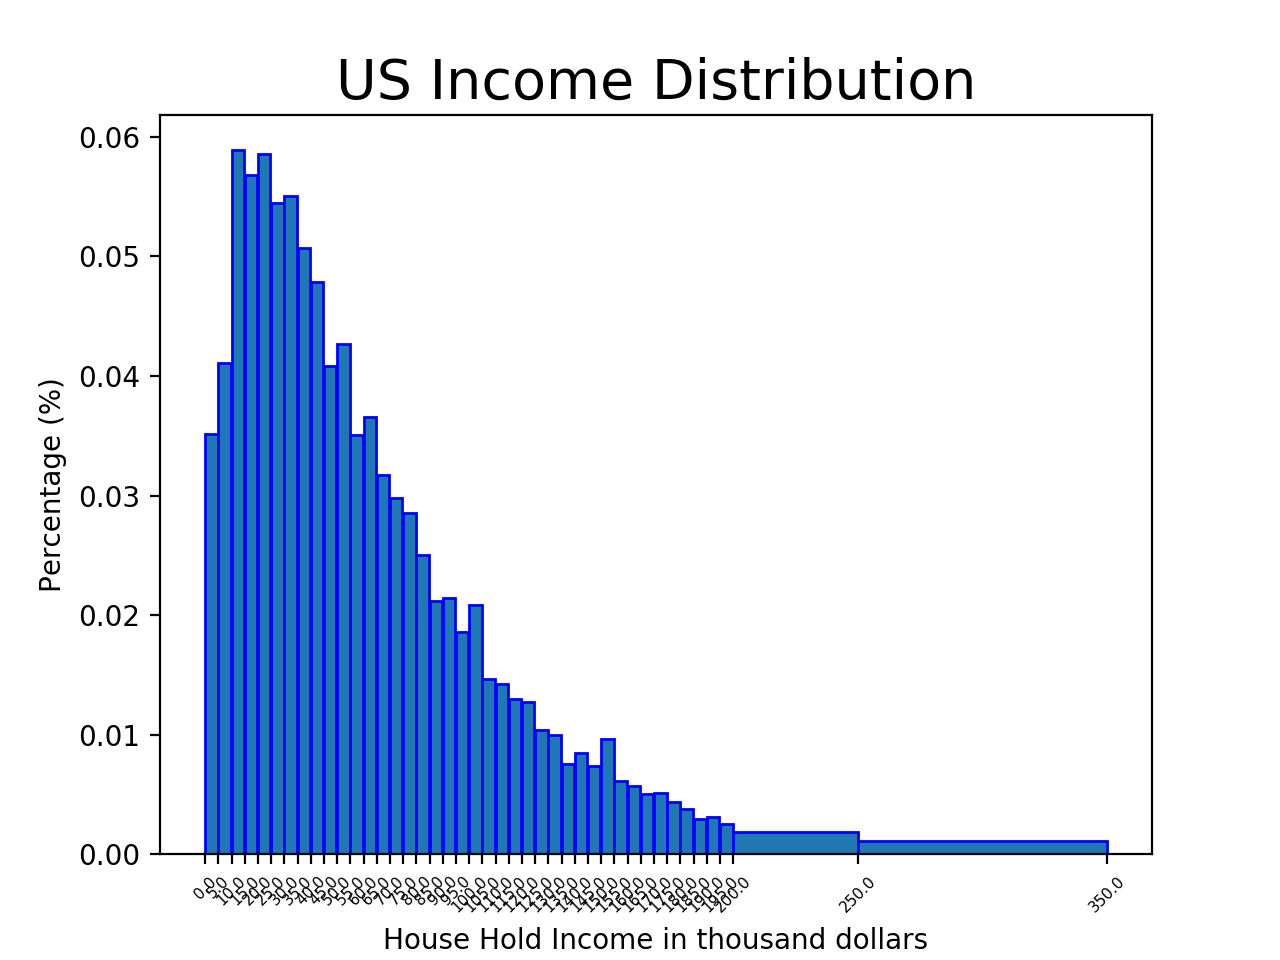

In [19]:
#1.a_2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
height_1=np.append(pts[:40,0],[pts[40,0]/10,pts[41,0]/20,0])
#Value of 41st bar is divided by 10.
#Value of 42nd bar is divided by 20
N=len(pts)
plt.figure()
tick_1=np.append(np.array(pts[:40,1]/1000-2.5),[200,250,350])
width_1=np.append(np.linspace(2.9,2.9,40),[2.9*10,2.9*20,0])
ypos_1=np.append(np.linspace(0,123,41),[152,210])
plt.bar(ypos_1,height=height_1,width=width_1,edgecolor='blue',align='edge') 
plt.title('US Income Distribution', fontsize=20)
plt.xlabel('House Hold Income in thousand dollars')
plt.ylabel('Percentage (%)')
plt.xticks(ypos_1,tick_1,fontsize=5.5, rotation=45)
plt.show()

#### 3.(b)

In [20]:
#1.b_1
import scipy.optimize as opt
import scipy.integrate as intgr
import scipy.stats as sts
tick2 = np.append(np.array(pts[:40,1]/1000+2.5),[250,350])
tick3 = np.append(np.array(pts[:40,1]/1000-2.5),[200,250])

def model_moment(mu,sig):
    pb1 = sts.lognorm.cdf(tick2, sig, scale = np.exp(mu))
    pb2 = sts.lognorm.cdf(tick3, sig, scale = np.exp(mu))
    return pb1 - pb2

def err_vec(xvals, mu, sigma):
    data = xvals
    model = model_moment(mu,sigma)
    err_vec = data - model
    return err_vec

def criterion(params, *args):
    mu, sig = params
    xvals, W = args
    err = err_vec(xvals, mu, sig)
    crit_val = err.T @ W @ err
    return crit_val

mu_init = np.log(pts[:,1].mean())
sig_init = np.log(pts[:,1].std())
params_init = np.array([mu_init, sig_init])
W = np.diag(pts[:,0])
gmm_args = (pts[:,1], W)

result = opt.minimize(criterion, params_init, args = (gmm_args), method = 'L-BFGS-B', bounds = ((None,None),(1e-10,None)))
mu_GMM1, sig_GMM1 = result.x


mean_data=pts[:,1].mean()
sig_data = pts[:,1].std()
pdf = model_moment(mu_GMM1, sig_GMM1)
err1 = err_vec(pts[:,1], mu_GMM1, sig_GMM1)

print(result)
print('Mean of points =', mean_data, ', STD of points =', sig_data)
print('Error vector=', err1)
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)

      fun: 8163657243.680649
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([11.58745852, 11.10663857])
Mean of points = 107738.09523809524 , STD of points = 66611.9035278979
Error vector= [  2499.81550943   7499.98290612  12499.98957507  17499.99241586
  22499.99401148  27499.99503917  32499.99575854  37499.99629128
  42499.99670224  47499.99702921  52499.99729576  57499.99751735
  62499.99770456  67499.99786489  72499.99800377  77499.99812529
  82499.99823253  87499.99832789  92499.99841326  97499.99849014
 102499.99855975 107499.99862308 112499.99868095 117499.99873404
 122499.99878294 127499.99882811 132499.99886998 137499.99890889
 142499.99894515 147499.99897903 152499.99901075 157499.99904052
 162499.99906851 167499.99909488 172499.99911977 177499.99914329
 182499.99916557 187499.99918669 192499.99920674 197499

<IPython.core.display.Javascript object>


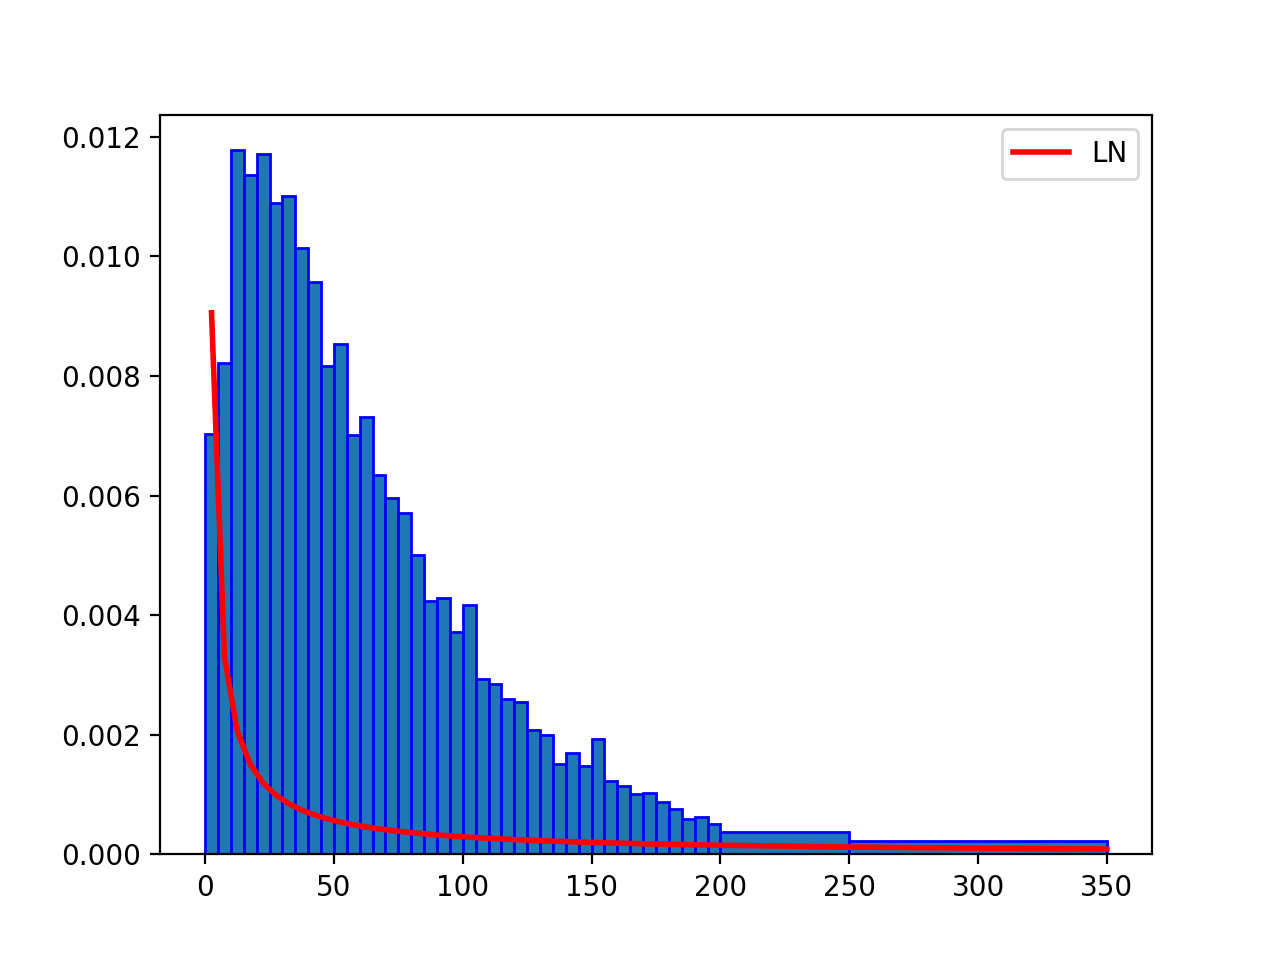

In [21]:
#1.b_2
plt.figure()
aaa=pts[0:42,1]/1000
bbb=np.append(pts[0:40,0]/5,[pts[40,0]/50,pts[41,0]/100])
ccc=np.append(np.linspace(5,5,40),[5*10,5*20])
data = np.append(pts[0:40,1]/1000, [200,250,300,350])
plt.bar(aaa, bbb, width =ccc , align = 'center', edgecolor='blue')
plt.plot(data, sts.lognorm.pdf(data, sig_GMM1, scale = np.exp(mu_GMM1)), color = 'r', linewidth = 2, label = 'LN')
plt.legend(loc = 'upper right')
plt.show()

#### 2.(c)

In [22]:
#1.c_1
def model_moment2(alpha,beta):
    pb1 = sts.gamma.cdf(tick2, alpha, scale = beta)
    pb2 = sts.gamma.cdf(tick3, alpha, scale = beta)
    return pb1-pb2

def err_vec2(xvals, alpha, beta):
    data = xvals
    model = model_moment2(alpha,beta)
    err_vec = data - model
    return err_vec

def criterion2(params, *args):
    alpha, beta = params
    xvals, W = args
    err = err_vec2(xvals, alpha, beta)
    crit_val = err.T @ W @ err
    return crit_val

alpha2_init = 3
beta2_init = 20
params2_init = np.array([alpha2_init, beta2_init])
W = np.diag(pts[:,0])
gmm_args = (pts[:,1], W)

result2 = opt.minimize(criterion2, params2_init, args = (gmm_args), method = 'L-BFGS-B', bounds = ((1e-10,None),(1e-10,None)))
alpha_gmm2, beta_gmm2= result2.x
print(result2)

      fun: 8163654012.025581
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  0.        , -95.36743164])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 42
      nit: 2
   status: 0
  success: True
        x: array([ 4.00000006, 20.        ])


<IPython.core.display.Javascript object>


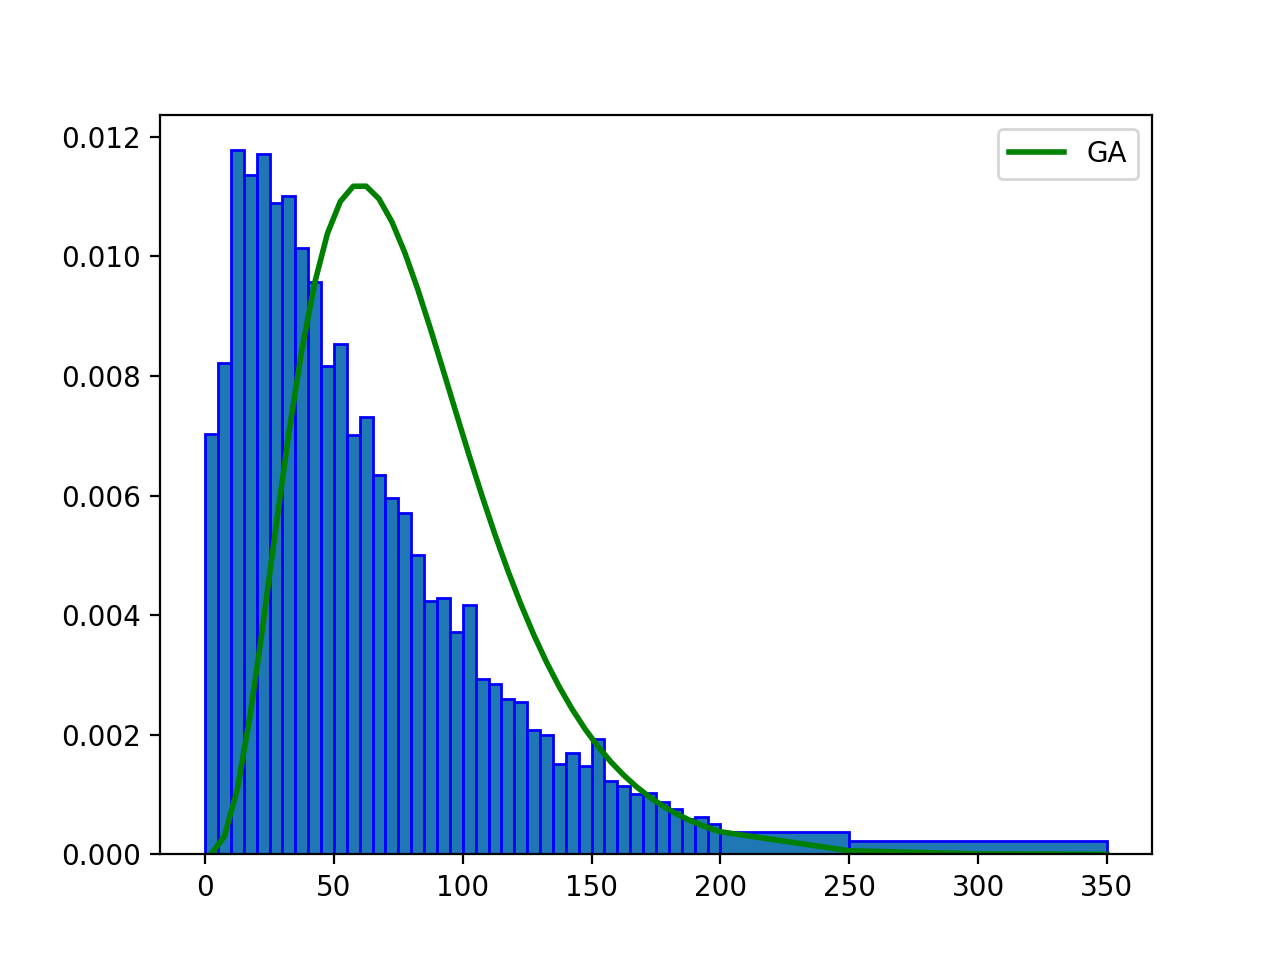

In [23]:
#1.c_2
plt.figure()
aaa=pts[0:42,1]/1000
bbb=np.append(pts[0:40,0]/5,[pts[40,0]/50,pts[41,0]/100])
ccc=np.append(np.linspace(5,5,40),[5*10,5*20])
data = np.append(pts[0:40,1]/1000, [200,250,300,350])
plt.bar(aaa, bbb, width =ccc , align = 'center', edgecolor='blue')
plt.plot(data, sts.gamma.pdf(data, alpha_gmm2, scale =beta_gmm2), color = 'g', linewidth = 2, label = 'GA')
plt.legend(loc = 'upper right')
plt.show()

In [35]:
#### 3.(d)

<IPython.core.display.Javascript object>


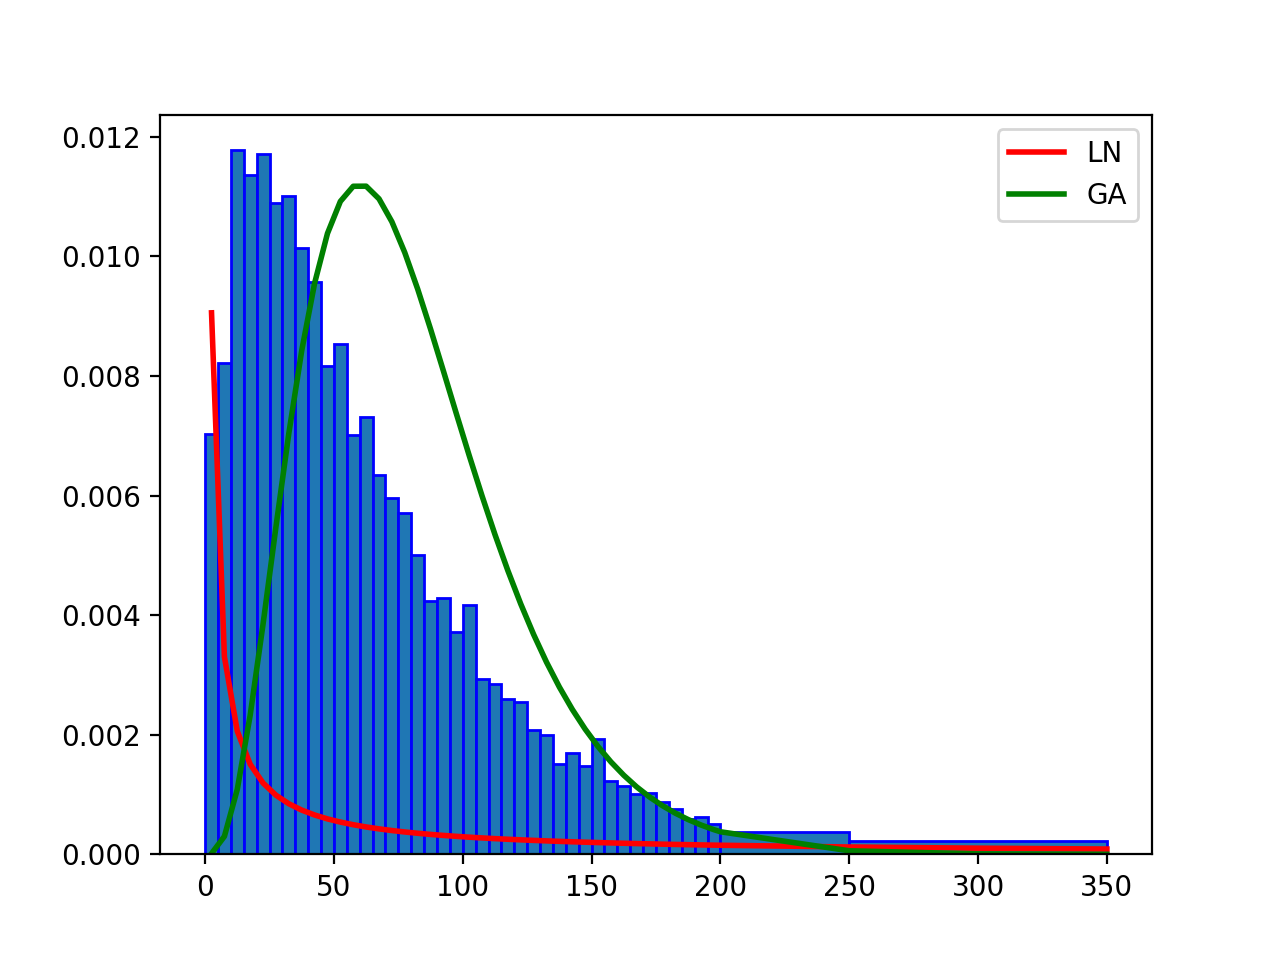

In [24]:
#1.d_1
plt.figure()
aaa=pts[0:42,1]/1000
bbb=np.append(pts[0:40,0]/5,[pts[40,0]/50,pts[41,0]/100])
ccc=np.append(np.linspace(5,5,40),[5*10,5*20])
data = np.append(pts[0:40,1]/1000, [200,250,300,350])
plt.bar(aaa, bbb, width =ccc , align = 'center', edgecolor='blue')
plt.plot(data, sts.lognorm.pdf(data, sig_GMM1, scale = np.exp(mu_GMM1)), color = 'r', linewidth = 2, label = 'LN')
plt.plot(data, sts.gamma.pdf(data, alpha_gmm2, scale =beta_gmm2), color = 'g', linewidth = 2, label = 'GA')
plt.legend(loc = 'upper right')
plt.show()

In [25]:
#1.d_2 
obj_val1 = result.fun
obj_val2 = result2.fun
print('Minimized Lognormal Objective =', obj_val1)
print('Minimized Gamma Objective =', obj_val2)
#The most precise way I guess is to compare their objective functions.
#From the graph and the test results shown above, Gamma Distribution fits the data better than Lognormal Distribution.

Minimized Lognormal Objective = 8163657243.680649
Minimized Gamma Objective = 8163654012.025581


#### 3.(e)

In [ ]:
#1.e_1
#First Step W
params3_init=[alpha_gmm2,beta_gmm2]
WI = np.identity(pts[:,1].shape[0])
gmm2s_args = (pts[:,1], WI)

result3 = opt.minimize(criterion2, params3_init, args = gmm2s_args, method = 'L-BFGS-B', bounds = ((1e-10,None),(1e-10,None)))
alpha_1, beta_1 = result3.x
err_vec3 = np.reshape(err_vec2(pts[:,1], alpha_1, beta_1),(42,1))
omega = (err_vec3 @ err_vec3.T) / pts[:,1].shape[0] 

#Second Step W
W2S = np.linalg.pinv(omega)
gmm2s2_args = (pts[:,1], W2S)
params4_init = np.array([alpha_1, beta_1])
result4 = opt.minimize(criterion2, params4_init, args = gmm2s2_args, method = 'L-BFGS-B', bounds = ((1e-10,None),(1e-10,None)), tol = 1e-10)
alpha_2, beta_2 = result4.x
print('Estimation Result')
print('')
print(result4)

#1.e_2
obj_val3 = result2.fun
obj_val4 = result4.fun
print('Minimized Gamma Objective =', obj_val3)
print('Minimized Gamma with 2-Step Objective =', obj_val4)
#Yes, alpha and beta change quite a bit. From (3.99, 19.90) to (10.37, 23.26).
#I compare the difference by comparing the number of their repective objective functions.

Yes, alpha and beta change quite a bit. From (3.99, 19.90) to (10.37, 23.26).
I compare the difference by comparing the number of their repective objective functions.

### Exercise 4

In [26]:
#Brock and Mirman(1972) by GMM
pts2 = np.loadtxt('MacroSeries.txt', delimiter = ',')

def z_1(alpha, xvals):
    z = np.log(xvals[:,3]/(alpha*xvals[:,1]**(alpha-1)))
    return z

#Moment Conditions
def data_moment2(alpha, beta, rho, mu, xvals):
    z = z_1(alpha, xvals)
    z_t = z[1:100]
    z_t_1 = z[0:99]
    k_t = xvals[:,1][1:100] 
    c_t = xvals[:,0][1:100]
    c_t_1 = xvals[:,0][0:99]
    w_t_1 = xvals[:,2][0:99]
    m1 = (z_t - rho*z_t_1 - (1-rho)*mu).mean()
    m2 = ((z_t - rho*z_t_1 - (1-rho)*mu)*z_t).mean()
    m3 = (beta*alpha*np.exp(z_t)*k_t**(alpha-1)*c_t/c_t_1 - 1).mean()
    m4 = ((beta*alpha*np.exp(z_t)*k_t**(alpha-1)*c_t/c_t_1 - 1)*w_t_1).mean()    
    return m1, m2, m3, m4

def err_vec2(alpha, beta, rho, mu, xvals):
    m1, m2, m3, m4 = data_moment2(alpha, beta, rho, mu, xvals)
    err_vec = np.array([m1, m2, m3, m4])
    return err_vec.T

def criterion2(params, *args):
    alpha, beta, rho, mu = params
    xvals,W = args
    err = err_vec2(alpha, beta, rho, mu, xvals)
    crit_val = err.T @ W @ err
    return crit_val

#Initial Values
alpha_init2 = 0.30
beta_init2 = 0.85
rho_init2 = 0.85
mu_init2 = 9.5

#Identity Matrix
W = np.eye(4)
params_2 = np.array([alpha_init2, beta_init2, rho_init2, mu_init2])
gmm2_arg= (pts2,W)
result_2 = opt.minimize(criterion2, params_2, args = gmm2_arg, method = 'L-BFGS-B', bounds = ((1e-10, 1-1e-10),(1e-10, 1-1e-10),(-1+1e-10, 1-1e-10),(1e-10, None)))
alpha_gmm2, beta_gmm2, rho_gmm2, mu_gmm2 = result_2.x

#Result
print(result_2)
#Estimated Values
print('alpha_GMM =', alpha_gmm2,'beta_GMM =',beta_gmm2, 'rho_GMM =',rho_gmm2, 'mu_GMM =',mu_gmm2)
#Minimized Criterion Function
print('Minimized Criterion Function =', result_2.fun)

      fun: 0.0013666963981870625
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.49774449e-02, 3.64728345e+05, 9.55599052e+00, 4.31801231e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 265
      nit: 21
   status: 0
  success: True
        x: array([0.01224711, 0.98982524, 0.99953084, 9.50000496])
alpha_GMM = 0.012247110548385575 beta_GMM = 0.9898252375303248 rho_GMM = 0.9995308386222698 mu_GMM = 9.50000495652849
Minimized Criterion Function = 0.0013666963981870625


### Exercise 5
#### 5(a)

In [38]:
# Import packages
import numpy as np
import numpy.random as rnd
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

#Loading the data
c = np.loadtxt('MacroSeries.txt', delimiter=",",usecols=0)
k = np.loadtxt('MacroSeries.txt', delimiter=",",usecols=1)
w = np.loadtxt('MacroSeries.txt', delimiter=",",usecols=2)
r = np.loadtxt('MacroSeries.txt', delimiter=",",usecols=3)
y = np.loadtxt('MacroSeries.txt', delimiter=",",usecols=4)

# Define function that draws N x S test score values from a normal distribution
def norm_draws(unif_vals, mu, sigma):
    norm_draws = sts.norm.ppf(unif_vals, loc=mu, scale=sigma)
    return norm_draws

# Define function that generates data moments.
def data_moments(xvals):
    mean_c = np.mean(xvals[0])
    mean_k = np.mean(xvals[1])
    mean_cy = np.mean(np.divide(xvals[0],xvals[4]))
    var_y = np.var(xvals[4])
    corr_cc = np.corrcoef(xvals[0][0:-2],xvals[0][1:-1])[0,1]
    corr_ck = np.corrcoef(xvals[0][0:-1],xvals[4][0:-1])[0,1]
    return mean_c, mean_k, mean_cy, var_y, corr_cc, corr_ck

#Define Data Simulation Function.
def sim_data(params,args):
    mu, rho, sigma,alpha=params
    xvals, k_1,beta, T, S, W_hat=args  
    unif_vals_1 = sts.uniform.rvs(0, 1, size=(T+1,S)) #Uniform Draws
    eps=norm_draws(unif_vals_1[1],0,sigma)         #Error Terms

    #Generating z_t
    z_t=np.linspace(0,T,T+2)
    for i in range(0,T+2):
        if i==0:
              z_t[i]=mu
        else:
              z_t[i]=z_t[i-1]*rho+mu*(1-rho)+eps[i-1]
    
    #Generating k_t
    k_t=np.linspace(0,T,T+1)
    for i in range(0,T):
        if i==0:
            k_t[i]=k_1
        else:
            k_t[i]=np.log(alpha)+np.log(beta)+z_t[i+1]+alpha*np.log(k_t[i-1])

    #Generating w_t and r_t
    z_t = z_t[1:T+2]
    w_t = np.log(1-alpha) + z_t + np.log(k_t)*alpha
    r_t = np.log(alpha) + z_t + np.log(k_t)*(1-alpha)
    w_t = w_t[0:T]
    r_t = r_t[0:T]
    z_t = z_t[0:T]
    c_t = r_t*k_t[0:T] + w_t - k_t[1:T+1]
    y_t = np.exp(z_t)*k_t[0:T]**alpha

    sim_vals = [c_t,k_t,w_t,r_t,y_t]
    return sim_vals

#Define Data Simulation Function with S=loop.
def sim_data2(params,args):
    mu, rho, sigma,alpha=params
    xvals, k_1,beta, T, S, W_hat=args  
    for s in range(0,S):
        unif_vals_1 = sts.uniform.rvs(0, 1, size=(T+1,S)) #Uniform Draws
        eps=norm_draws(unif_vals_1[1],0,sigma)         #Error Terms

    #Generating z_t
        z_t=np.linspace(0,T,T+2)
        for i in range(0,T+2):
            if i==0:
                  z_t[i]=mu
            else:
                  z_t[i]=z_t[i-1]*rho+mu*(1-rho)+eps[i-1]
    
    #Generating k_t
        k_t=np.linspace(0,T,T+1)
        for i in range(0,T):
            if i==0:
                k_t[i]=k_1
            else:
                k_t[i]=np.log(alpha)+np.log(beta)+z_t[i+1]+alpha*np.log(k_t[i-1])

    #Generating w_t and r_t
        z_t = z_t[1:T+2]
        w_t = np.log(1-alpha) + z_t + np.log(k_t)*alpha
        r_t = np.log(alpha) + z_t + np.log(k_t)*(1-alpha)
        w_t = w_t[0:T]
        r_t = r_t[0:T]
        z_t = z_t[0:T]
        c_t = r_t*k_t[0:T] + w_t - k_t[1:T+1]
        y_t = np.exp(z_t)*k_t[0:T]**alpha
        sim_vals_t = [c_t,k_t,w_t,r_t,y_t]
        if s==0:
            sim_vals_s = sim_vals_t
        else:
            sim_vals_s = sim_vals_s + np.divide((c_t,k_t,w_t,r_t,y_t),S)
    return sim_vals_s

#Define Moment Error Function
def err_vec(data_vals, sim_vals, simple):
    mean_c_d, mean_k_d, mean_cy_d, var_y_d, corr_cc_d, corr_ck_d = data_moments(data_vals)
    moms_data =[[mean_c_d], [mean_k_d],[mean_cy_d],[var_y_d],[corr_cc_d],[corr_ck_d]]
    mean_c_s, mean_k_s, mean_cy_s, var_y_s, corr_cc_s, corr_ck_s = data_moments(sim_vals)
    moms_model = np.array([[mean_c_s], [mean_k_s],[mean_cy_s],[var_y_s],[corr_cc_s],[corr_ck_s]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec

#Define Criterion Functions
def criterion(params, *args):
    mu, rho, sigma, alpha = params
    xvals, k_1, beta, T, S, W_hat = args
    sim_vals=sim_data(params,args)               #Using sim_data
    err = err_vec(xvals, sim_vals, simple=False)
    crit_val = np.dot(np.dot(err.T, W_hat), err) 
    return crit_val

#Define Criterion Functions
def criterion2(params, *args):
    mu, rho, sigma, alpha = params
    xvals, k_1, beta, T, S, W_hat = args
    sim_vals=sim_data2(params,args)               #Using sim_data2
    err = err_vec(xvals, sim_vals, simple=False)
    crit_val = np.dot(np.dot(err.T, W_hat), err) 
    return crit_val

In [41]:
#Initial Values
mu = 9.1
rho = 0.01
sigma = 0.03
alpha = 0.40
params=(mu, rho, sigma, alpha)

#Assumptions
xvals=data
k_1=np.mean(xvals[1])
beta=0.8
S=1000
T=100
nm=6            #number of moment
W_hat=np.eye(nm)
args=(xvals, k_1, beta, T, S, W_hat)

#Bounds
mub=(5,14)
rhob=(-0.99,0.99)
sigmab=(0.01,1.1)
alphab=(0.01,0.99)

#crit_test = criterion(params, *args)
crit_test = criterion2(params, *args)  #S=1000
sim_vals=sim_data(params, args)
mean_c_d, mean_k_d, mean_cy_d, var_y_d, corr_cc_d, corr_ck_d = data_moments(data)
mean_c_s, mean_k_s, mean_cy_s, var_y_s, corr_cc_s, corr_ck_s = data_moments(sim_vals)
print('Data Mean of Consumption =', mean_c_d,'Data Mean of Capital =',mean_k_d)
print('Model Mean of Consumption =', mean_c_s,'Model Mean of Capital =',mean_k_s)
print('')
print('Data Mean of Consump/GDP =', mean_cy_d,'Data Variance of GDP =',var_y_d)
print('Model Mean of Consump/GDP =', mean_cy_s,'Model Variance of GDP =',var_y_s)
print('')
print('Data AR of Consumption =', corr_cc_d, 'Data Corr of Consump and Capital =',corr_ck_d )
print('Model AR of Consumption =', corr_cc_s, 'Model Corr of Consump and Capital =',corr_ck_s )
print('')
print('Criterion Value =',crit_test)
print('')
results = opt.minimize(criterion, params, args=args, method='L-BFGS-B',bounds=(mub,rhob,sigmab,alphab,))
print('SMM Estimates')
mu_SMM, rho_SMM, sigma_SMM, alpha_SMM = results.x
print('mu_SMM=', mu_SMM,'rho_SMM=', rho_SMM,'sigma_SMM=', sigma_SMM, 'alpha_SMM=', alpha_SMM)
print('')
print(results)

Data Mean of Consumption = 9968004.268681431 Data Mean of Capital = 10611652.281509608
Model Mean of Consumption = 1896697.1928164605 Model Mean of Capital = 105075.57337177481

Data Mean of Consump/GDP = 1.1747002781474838 Data Variance of GDP = 25820903147709.977
Model Mean of Consump/GDP = 0.3373547659824874 Model Variance of GDP = 317788377100.41425

Data AR of Consumption = -0.7024930005873982 Data Corr of Consump and Capital = 0.9993134156690665
Model AR of Consumption = 0.9949205511890654 Model Corr of Consump and Capital = 0.9999990298678028

Criterion Value = [[8.61973911]]

SMM Estimates
mu_SMM= 9.100000598228924 rho_SMM= 0.00999983217424731 sigma_SMM= 0.029999957211459236 alpha_SMM= 0.3999999501818876

      fun: array([[8.96743075]])
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  183874.12049634,  -709273.54337265,   175003.81881721,
       -1108717.06955482])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 200
      nit

In [40]:
#SMM Results
params_SMM=(mu_SMM, rho_SMM, sigma_SMM, alpha_SMM)
draw_SMM=sim_data(params_SMM, args)
mean_c_s, mean_k_s, mean_cy_s, var_y_s, corr_cc_s, corr_ck_s = data_moments(draw_SMM)
err_1 = err_vec(data, draw_SMM,False).reshape(6,)
print('Data Mean of Consumption =', mean_c_d,'Data Mean of Capital =',mean_k_d)
print('Model Mean of Consumption =', mean_c_s,'Model Mean of Capital =',mean_k_s)
print('')
print('Data Mean of Consump/GDP =', mean_cy_d,'Data Variance of GDP =',var_y_d)
print('Model Mean of Consump/GDP =', mean_cy_s,'Model Variance of GDP =',var_y_s)
print('')
print('Data AR of Consumption =', corr_cc_d, 'Data Corr of Consump and Capital =',corr_ck_d )
print('Model AR of Consumption =', corr_cc_s, 'Model Corr of Consump and Capital =',corr_ck_s )
print('')
print('Criterion Value =',crit_test[0])
print('')
print('Error vector 1 =', err_1)

Data Mean of Consumption = 9968004.268681431 Data Mean of Capital = 10611652.281509608
Model Mean of Consumption = 1899277.712460408 Model Mean of Capital = 105075.79046673095

Data Mean of Consump/GDP = 1.1747002781474838 Data Variance of GDP = 25820903147709.977
Model Mean of Consump/GDP = 0.329848626052709 Model Variance of GDP = 333653637715.0652

Data AR of Consumption = -0.7024930005873982 Data Corr of Consump and Capital = 0.9993134156690665
Model AR of Consumption = 0.9937888121786075 Model Corr of Consump and Capital = 0.9999991021777336

Criterion Value = [8.61820478]

Error vector 1 = [-8.09462590e-01 -9.90098074e-01 -7.19206139e-01 -9.87078158e-01
 -2.41466009e+00  6.86157614e-04]
